<h1>Imports and Creating Main Dataframe</h1>

In [2]:
import pandas as pd
import math
from Tools import plotting
from Tools import survey_dictionary
survey_df = pd.read_csv("Spreadsheets/course-criteria-survey-scrubbed.tsv", sep='\t')

# Remove meta-data and only retain the questions/responses
responses_df = survey_df.drop(survey_df.columns[0:5], axis=1)

# Drop all rows where all cells are "NaN"
responses_df = responses_df.dropna(how="all")
responses_df = responses_df.reset_index(drop=True)

# Q8 & Q13 are short-answer, should not be counted
responses_df.drop("Q8", axis=1, inplace=True)
responses_df.drop("Q13", axis=1, inplace=True)

<h1>Find Faculty Response Rates</h1>

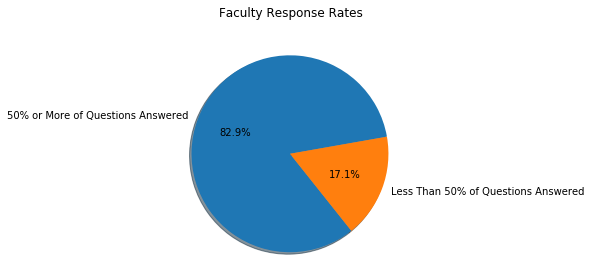

In [3]:
# Dictionary Keys
gte_half = "50% or More of Questions Answered"
lt_half = "Less Than 50% of Questions Answered"
title = "Faculty Response Rates"
# aka columns
num_questions = responses_df.shape[1]
# aka rows
num_responses = responses_df.shape[0]
# Define what half of questions answered is
HALF = math.ceil(0.5 * num_questions)

null_counts = {gte_half: 0, lt_half: 0}
# Find null counts for each row, make list where list index
# corresponds to data frame index
null_counts_ls = responses_df.isnull().sum(axis=1).tolist()

# Count rows with responses all left null
all_null = [i for i in range(len(null_counts_ls)) if
            null_counts_ls[i] == num_questions]
# Count rows with half or more questions answered
null_counts[gte_half] = len([i for i in range(len(null_counts_ls)) if
                             null_counts_ls[i] <= HALF])
# Count rows with < half of questions answered
null_counts[lt_half] = len([i for i in range(len(null_counts_ls)) if
                            null_counts_ls[i] > HALF])

plotting.make_pie(null_counts, title)


<h1>Find Response Share by Faculty Type</h1>

{'A': 19, 'B': 4, 'C': 8, 'D': 3, 'E': 1}


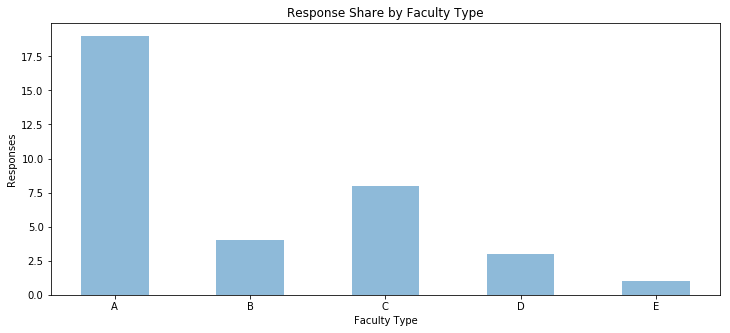

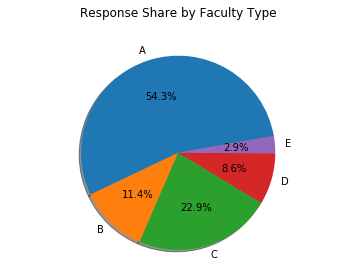

In [6]:
keys_ls = ["A", "B", "C", "D", "E"]

resp_cats = survey_dictionary.make_dictionary(keys_ls, keys_ls,
                                              responses_df, "Q1")
print(resp_cats)

x_title = "Responses"
y_title = "Faculty Type"
chart_title = "Response Share by Faculty Type"

plotting.make_bar(resp_cats, x_title, y_title, chart_title)
plotting.make_pie(resp_cats, chart_title)

